In [1]:
import pytraj as pt
import pandas as pd 
import mdtraj as md
import numpy as np
import glob
import matplotlib.pylab as plt 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pytraj as pt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.cm as cm
from scipy.spatial import distance

#run dependency script
%run "traj_analysis.py"

#specify dirs
TRAJHOME = "/home/jrocha/work_dir/mutations_g6pd/"
OUTPUTHOME = "/home/jrocha/work_dir/mutations_g6pd/"
common_ref = md.load_pdb('G6PD_WT_p_vacminned.pdb')

#specify trajectory dataset as produced by cppTraj (to combine)

wt = TRAJHOME+'WT_p/production_md/g6pd_WT_p_traj_510ns.nc'
MEDI = TRAJHOME+'MEDI_p/production_md/g6pd_MEDI_p_traj_510ns.nc'
ABEN = TRAJHOME+'Africa_A_ben/production_md/g6pd_ABEN_traj_510ns.nc'
ADEL = TRAJHOME+'Africa_A_del/production_md/g6pd_ADEL_traj_510ns.nc'
D350H = TRAJHOME+'D350H/production_md/g6pd_D350H_traj_510ns.nc'
M207T = TRAJHOME+'M207T/production_md/g6pd_M207T_traj_510ns.nc'
M212V = TRAJHOME+'M212V/production_md/g6pd_M212V_traj_510ns.nc'
R104H = TRAJHOME+'R104H/production_md/g6pd_R104H_traj_510ns.nc'
E156K = TRAJHOME+'E156K/production_md/g6pd_E156K_traj_510ns.nc'
L323P = TRAJHOME+'L323P/production_md/g6pd_L323P_traj_510ns.nc'

TOPWT=TRAJHOME+"WT_p/production_md/stripped.G6PD_WT_p_startMD.prmtop"
TOPMEDI=TRAJHOME+"MEDI_p/production_md/stripped.G6PD_MEDI_p_startMD.prmtop"
TOPABEN=TRAJHOME+"Africa_A_ben/production_md/stripped.G6PD_ABEN_startMD.prmtop"
TOPADEL=TRAJHOME+"Africa_A_del/production_md/stripped.G6PD_ADEL_startMD.prmtop"
TOPD350H = TRAJHOME+'D350H/production_md/stripped.G6PD_D350H_startMD.prmtop'
TOPM207T = TRAJHOME+'M207T/production_md/stripped.G6PD_M207T_startMD.prmtop'
TOPM212V = TRAJHOME+'M212V/production_md/stripped.G6PD_M212V_startMD.prmtop'
TOPR104H = TRAJHOME+'R104H/production_md/stripped.G6PD_R104H_startMD.prmtop'
TOPE156K = TRAJHOME+'E156K/production_md/stripped.G6PD_E156K_startMD.prmtop'
TOPL323P = TRAJHOME+'L323P/production_md/stripped.G6PD_L323P_startMD.prmtop'

traj_paths = [wt, MEDI, ABEN, ADEL, D350H, M207T, M212V, R104H, E156K, L323P ]
top_files = [TOPWT, TOPMEDI, TOPABEN, TOPADEL, TOPD350H, TOPM207T,  TOPM212V, TOPR104H, TOPE156K, TOPL323P ]
labels = ["WT", "MEDI", "ABEN","ADEL", "D350H", "M207T",  "M212V", "R104H", "E156K", "L323P" ]

traj_wt = md.load(wt, top=TOPWT)





In [3]:
#run through trajs and produce RMSD csv files
#this doesnt store all in memory at once to keep things smooth
for trajectory,topology,label in  zip(traj_paths, top_files, labels  ) :
    mytraj = md.load(trajectory, top=topology)
    rmsd = RMSD(mytraj, reference=common_ref)
    rmsd.to_csv(OUTPUTHOME+"/data/"+label+"_RMSD.csv", index=False)
    del rmsd

[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15711 15724 15725]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15689 15702 15703]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15695 15708 15709]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15703 15716 15717]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15687 15700 15701]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15691 15704 15705]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15679 15692 15693]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15707 15720 15721]
[    0     4    17 ... 15693 15706 15707]
[    0     4    17 ... 15683 15696 15697]
[    0     4    17 ... 15693 15706 15707]


In [2]:
#this generates the plots for RMSDs
#loads up the csvs 

data_home = "/home/jrocha/work_dir/mutations_g6pd/data/"

rmsds = pd.read_csv(data_home+labels[0]+'_RMSD.csv')
wtrmsd = pd.read_csv(data_home+'WT_RMSD.csv')
MEDIrmsd = pd.read_csv(data_home+'MEDI_RMSD.csv')
ADELrmsd = pd.read_csv(data_home+'ADEL_RMSD.csv')
ABENrmsd = pd.read_csv(data_home+'ABEN_RMSD.csv')
D350Hrmsd = pd.read_csv(data_home+'D350H_RMSD.csv')
M207Trmsd = pd.read_csv(data_home+'M207T_RMSD.csv')
M212Vrmsd = pd.read_csv(data_home+'M212V_RMSD.csv')
R104Hrmsd = pd.read_csv(data_home+'R104H_RMSD.csv')
E156Krmsd = pd.read_csv(data_home+'E156K_RMSD.csv')
L323Prmsd = pd.read_csv(data_home+'L323P_RMSD.csv')


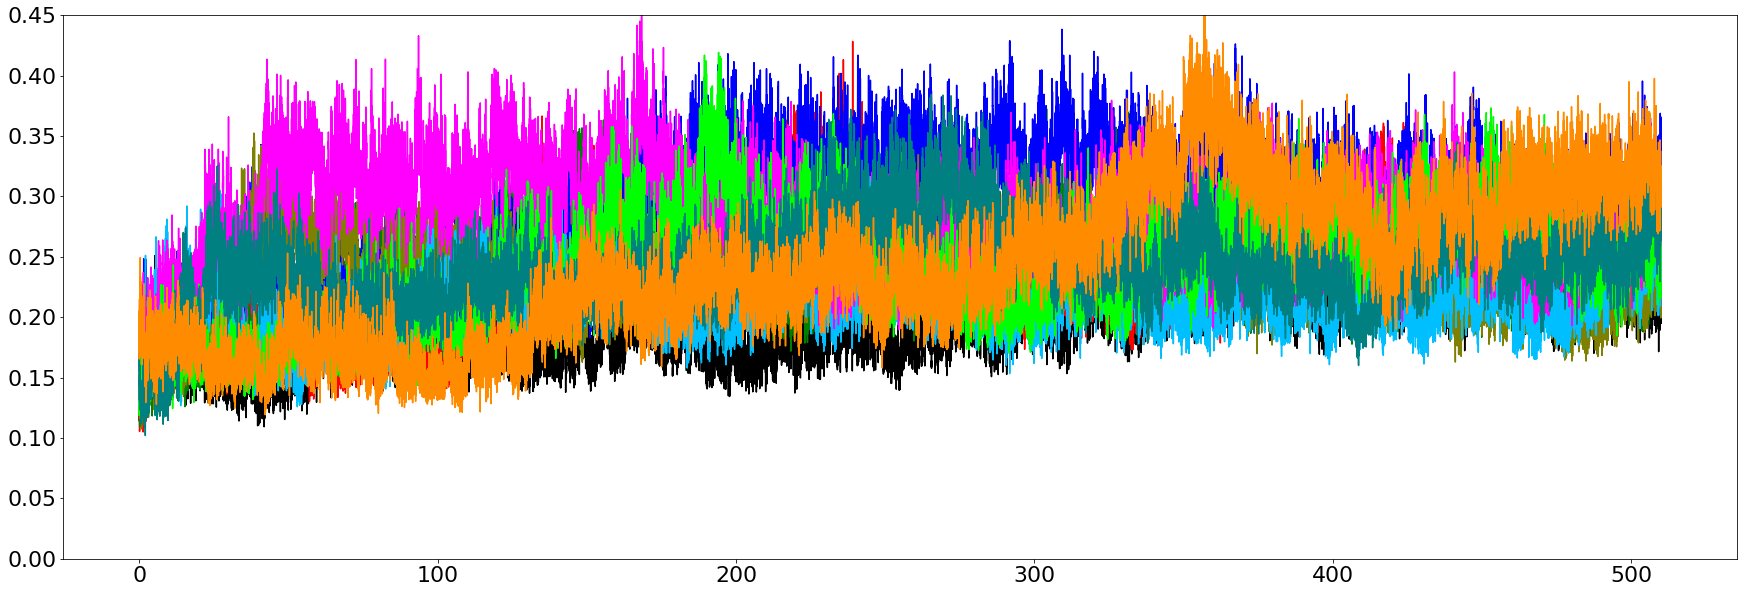

In [50]:
#PlotRmsd(rmsds)
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)


plt.plot(wtrmsd.Time, wtrmsd.RMSD, "black")
plt.plot(MEDIrmsd.Time, MEDIrmsd.RMSD, "red")
plt.plot(ABENrmsd.Time, ABENrmsd.RMSD, "green")
plt.plot(ADELrmsd.Time, ADELrmsd.RMSD, "blue")
plt.plot(D350Hrmsd.Time, D350Hrmsd.RMSD, "olive")
plt.plot(M207Trmsd.Time, M207Trmsd.RMSD, "deepskyblue")
plt.plot(M212Vrmsd.Time, M212Vrmsd.RMSD, "magenta")
plt.plot(R104Hrmsd.Time, R104Hrmsd.RMSD, "lime")
plt.plot(E156Krmsd.Time, E156Krmsd.RMSD, "teal")
plt.plot(L323Prmsd.Time, L323Prmsd.RMSD, "darkorange")


#plt.savefig('all_rmsd_310ns.png')

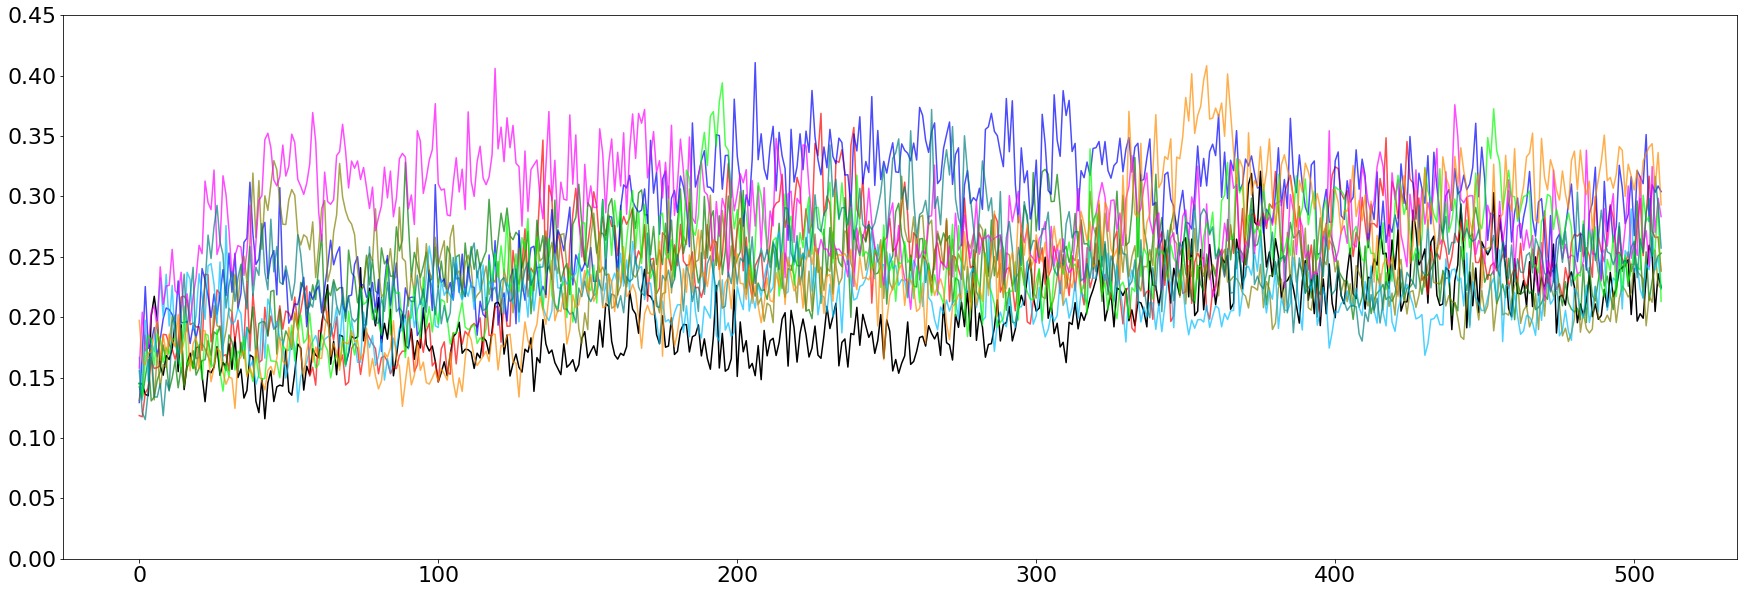

In [49]:
#this generates the plots for RMSDs with transparent lines
step = 100
#PlotRmsd(rmsds)
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)

plt.plot(wtrmsd.Time[0::step], wtrmsd.RMSD[0::step], "black")
plt.plot(MEDIrmsd.Time[0::step], MEDIrmsd.RMSD[0::step], "red", alpha=0.7)
plt.plot(ABENrmsd.Time[0::step], ABENrmsd.RMSD[0::step], "green", alpha=0.7)
plt.plot(ADELrmsd.Time[0::step], ADELrmsd.RMSD[0::step], "blue", alpha=0.7)
plt.plot(D350Hrmsd.Time[0::step], D350Hrmsd.RMSD[0::step], "olive", alpha=0.7)
plt.plot(M207Trmsd.Time[0::step], M207Trmsd.RMSD[0::step], "deepskyblue", alpha=0.7)
plt.plot(M212Vrmsd.Time[0::step], M212Vrmsd.RMSD[0::step], "magenta", alpha=0.7)
plt.plot(R104Hrmsd.Time[0::step], R104Hrmsd.RMSD[0::step], "lime", alpha=0.7)
plt.plot(E156Krmsd.Time[0::step], E156Krmsd.RMSD[0::step], "teal", alpha=0.7)
plt.plot(L323Prmsd.Time[0::step], L323Prmsd.RMSD[0::step], "darkorange", alpha=0.7)


#plt.savefig('all_rmsd_510ns.png')

In [18]:
step = 50
L323Prmsd.RMSD[0::step]

0        0.197408
50       0.229337
100      0.164222
150      0.196112
200      0.160786
           ...   
50750    0.319500
50800    0.336366
50850    0.320342
50900    0.292989
50950    0.278446
Name: RMSD, Length: 1020, dtype: float64

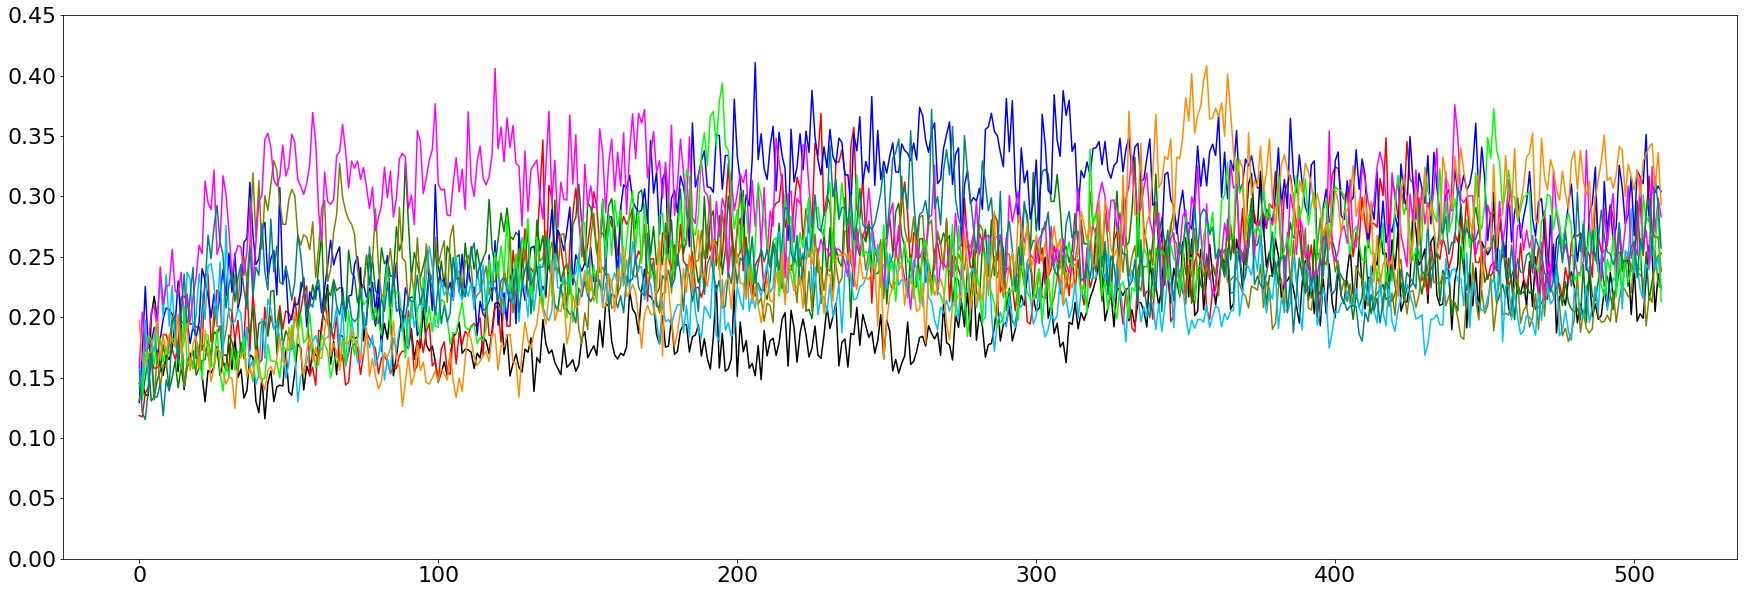

In [51]:
#this generates the plots for subsetted RMSDs with full lines
step = 100
#PlotRmsd(rmsds)
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)

plt.plot(wtrmsd.Time[0::step], wtrmsd.RMSD[0::step], "black")
plt.plot(MEDIrmsd.Time[0::step], MEDIrmsd.RMSD[0::step], "red" )
plt.plot(ABENrmsd.Time[0::step], ABENrmsd.RMSD[0::step], "green")
plt.plot(ADELrmsd.Time[0::step], ADELrmsd.RMSD[0::step], "blue")
plt.plot(D350Hrmsd.Time[0::step], D350Hrmsd.RMSD[0::step], "olive")
plt.plot(M207Trmsd.Time[0::step], M207Trmsd.RMSD[0::step], "deepskyblue")
plt.plot(M212Vrmsd.Time[0::step], M212Vrmsd.RMSD[0::step], "magenta")
plt.plot(R104Hrmsd.Time[0::step], R104Hrmsd.RMSD[0::step], "lime")
plt.plot(E156Krmsd.Time[0::step], E156Krmsd.RMSD[0::step], "teal")
plt.plot(L323Prmsd.Time[0::step], L323Prmsd.RMSD[0::step], "darkorange")


plt.savefig('all_rmsd_510ns.png')

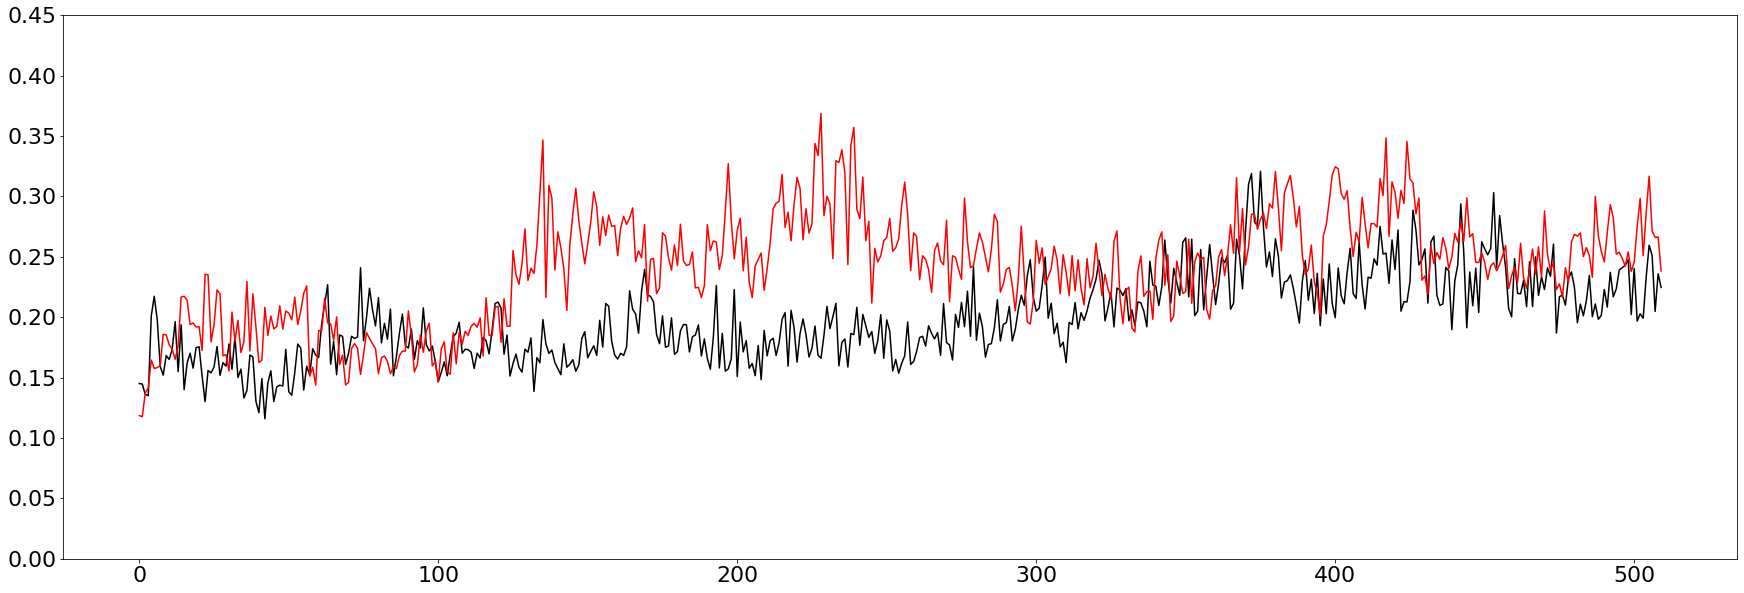

In [44]:
#plot WT vs MEDI
plt.ylim(0, 0.45)
plt.plot(wtrmsd.Time[0::step], wtrmsd.RMSD[0::step], "black")
plt.plot(MEDIrmsd.Time[0::step], MEDIrmsd.RMSD[0::step], "red" )
plt.savefig('WT_MEDI_rmsd_510ns.png')

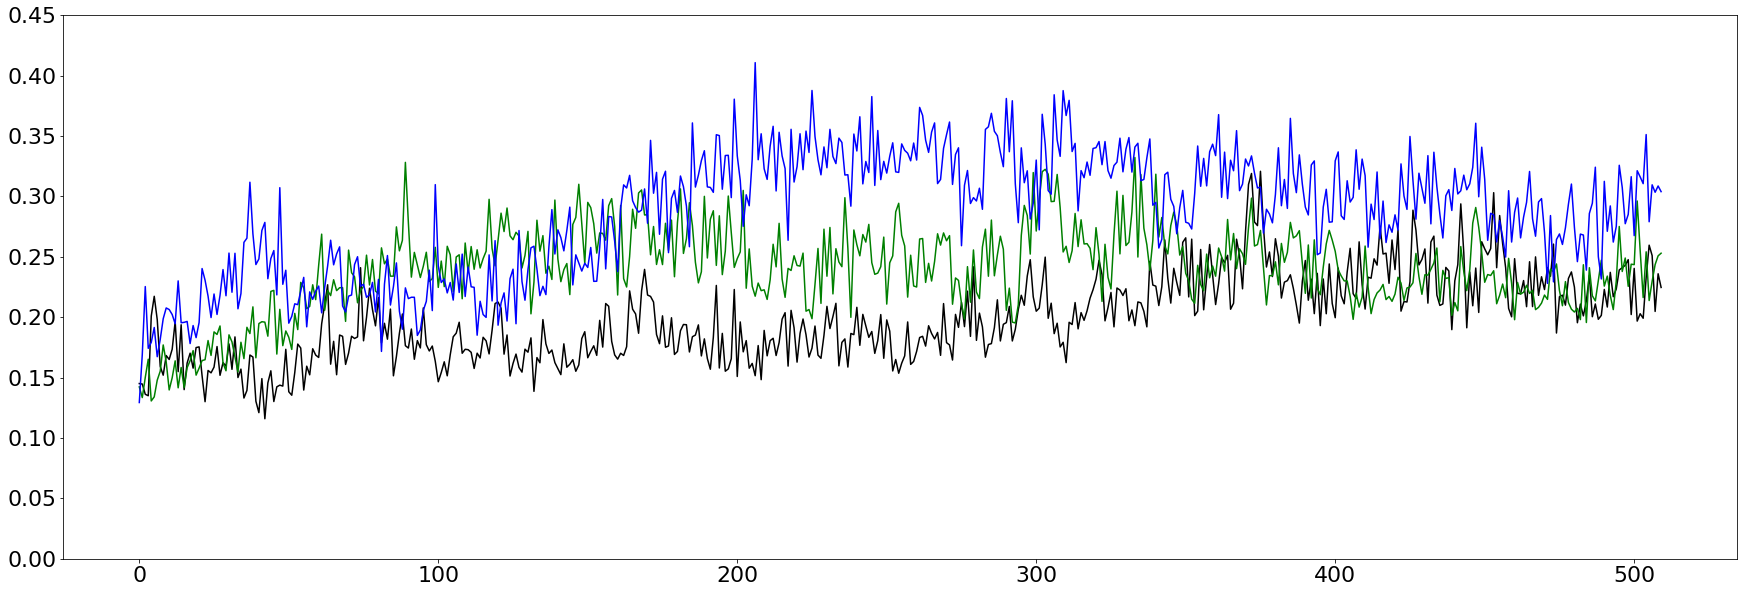

In [45]:
#Plot African vars
plt.ylim(0, 0.45)
plt.plot(wtrmsd.Time[0::step], wtrmsd.RMSD[0::step], "black")
plt.plot(ABENrmsd.Time[0::step], ABENrmsd.RMSD[0::step], "green")
plt.plot(ADELrmsd.Time[0::step], ADELrmsd.RMSD[0::step], "blue")
plt.savefig('WT_AFS_rmsd_510ns.png')

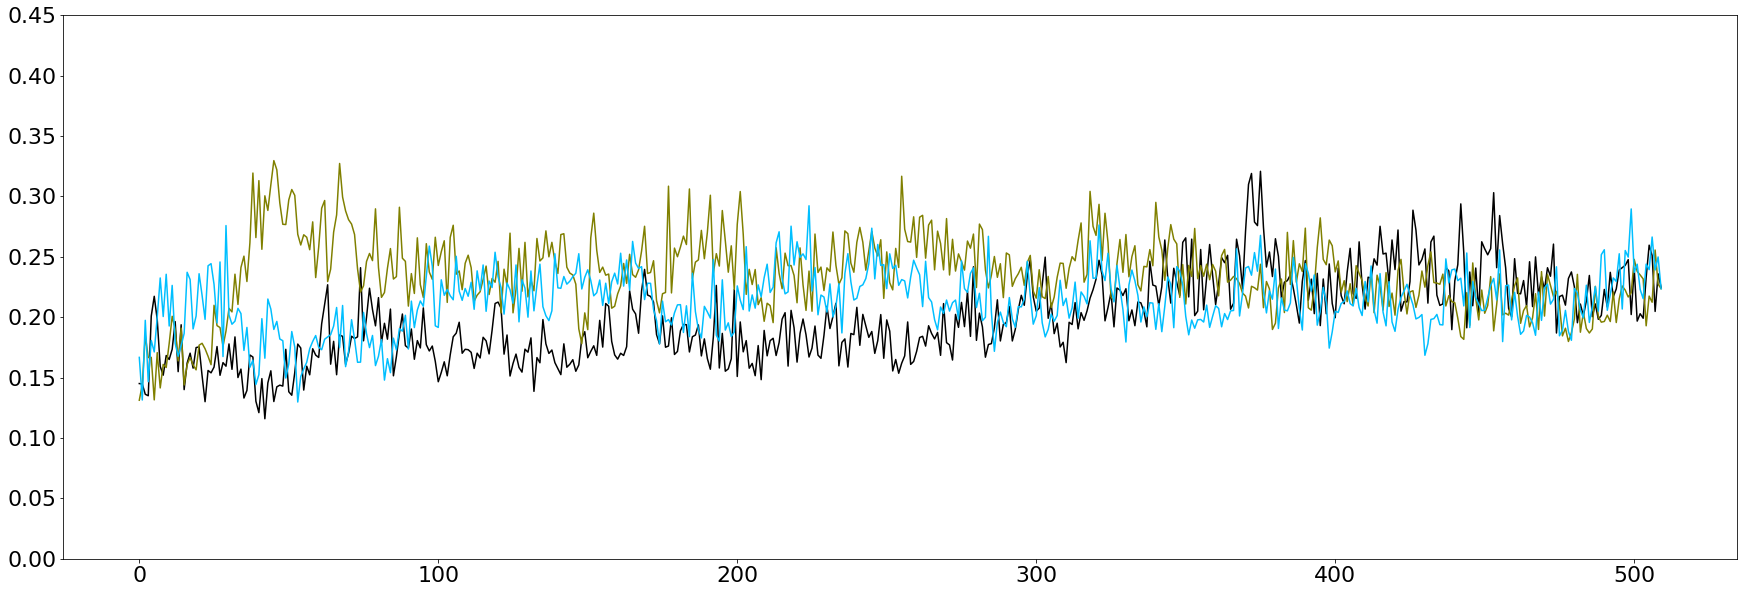

In [46]:
#plot D350H and M207T
plt.ylim(0, 0.45)
plt.plot(wtrmsd.Time[0::step], wtrmsd.RMSD[0::step], "black")
plt.plot(D350Hrmsd.Time[0::step], D350Hrmsd.RMSD[0::step], "olive")
plt.plot(M207Trmsd.Time[0::step], M207Trmsd.RMSD[0::step], "deepskyblue")
plt.savefig('WT_D350H_M207T_rmsd_510ns.png')

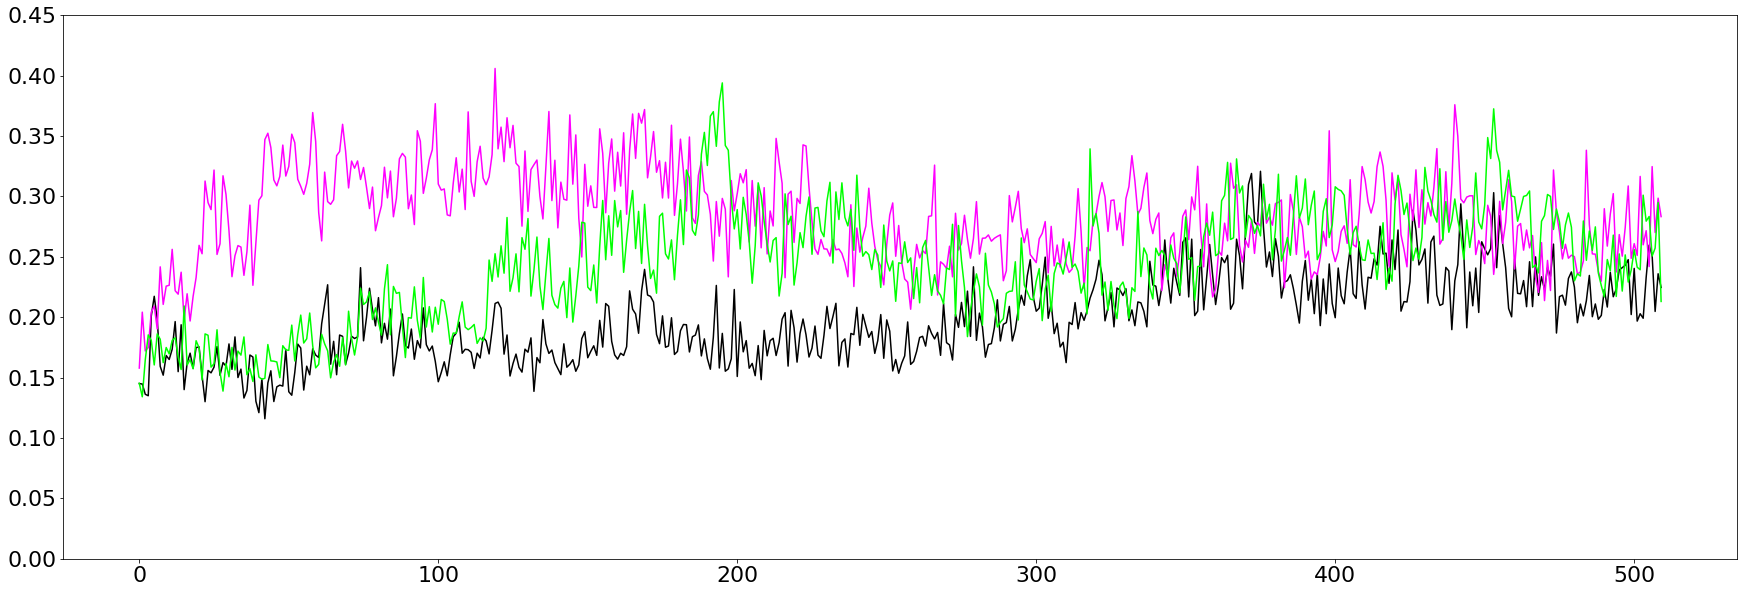

In [47]:
#plot M212V and R104H
plt.ylim(0, 0.45)
plt.plot(wtrmsd.Time[0::step], wtrmsd.RMSD[0::step], "black")
plt.plot(M212Vrmsd.Time[0::step], M212Vrmsd.RMSD[0::step], "magenta")
plt.plot(R104Hrmsd.Time[0::step], R104Hrmsd.RMSD[0::step], "lime")
plt.savefig('WT_M212V_R104H_rmsd_510ns.png')

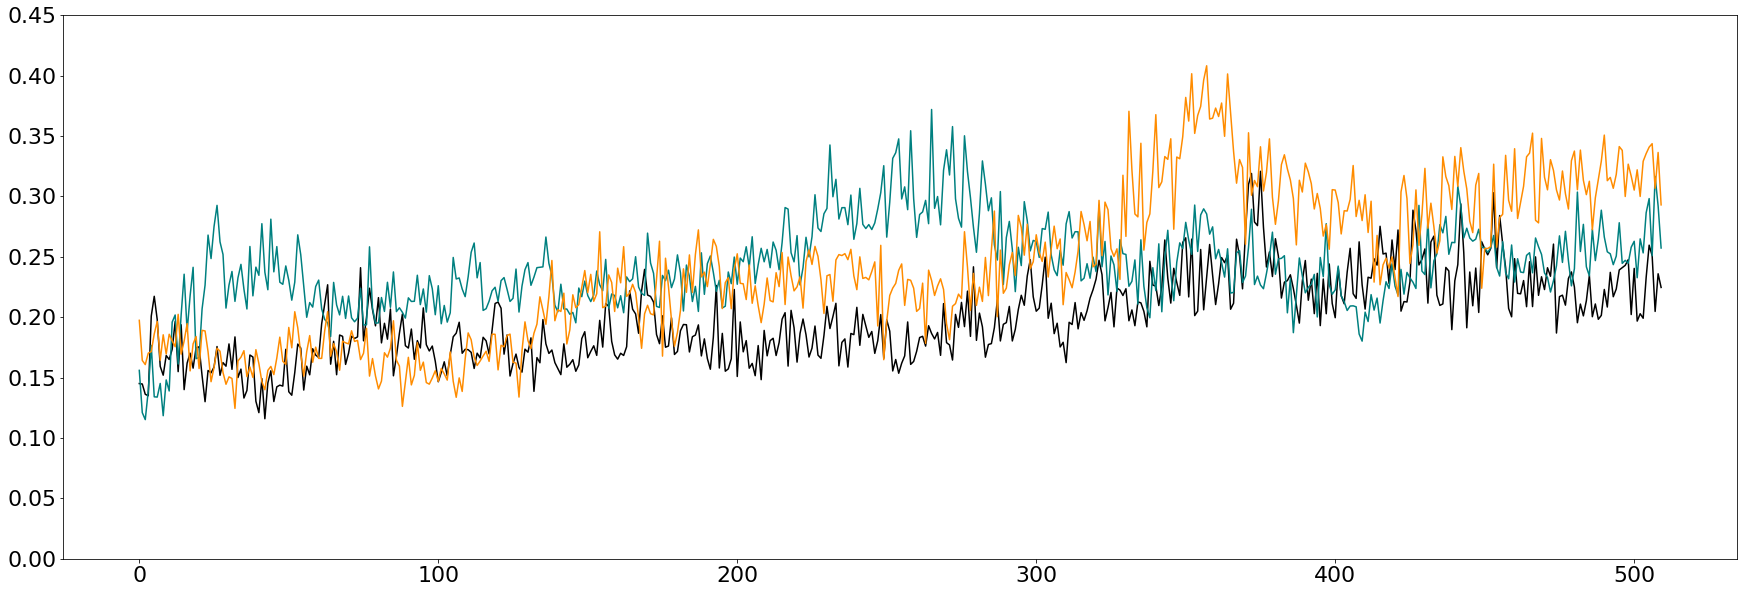

In [48]:
#plot E156K and L323P
plt.ylim(0, 0.45)
plt.plot(wtrmsd.Time[0::step], wtrmsd.RMSD[0::step], "black")
plt.plot(E156Krmsd.Time[0::step], E156Krmsd.RMSD[0::step], "teal")
plt.plot(L323Prmsd.Time[0::step], L323Prmsd.RMSD[0::step], "darkorange")
plt.savefig('WT_E156K_L323P_rmsd_510ns.png')

In [10]:
#RMSD in NADP binding region
#adapt RMSF_select function in traj_analysis,py to change AA selection

for trajectory,topology,label in  zip(traj_paths, top_files, labels  ) :
    mytraj = md.load(trajectory, top=topology)
    rmsd = RMSD_select(mytraj, reference=common_ref)
    rmsd.to_csv(OUTPUTHOME+"/data/"+label+"_Subset1_200_RMSD.csv", index=False)
    del rmsd

[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3282 3302 3303]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3271 3291 3292]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3274 3294 3295]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3270 3290 3291]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3272 3292 3293]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3266 3286 3287]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3280 3300 3301]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3273 3293 3294]
[  19   21   34 ... 3273 3293 3294]


In [13]:
#RMSD in active site region
%run "traj_analysis.py"
#adapt RMSF_select function in traj_analysis,py to change AA selection
for trajectory,topology,label in  zip(traj_paths, top_files, labels  ) :
    mytraj = md.load(trajectory, top=topology)
    rmsd = RMSD_selectAS(mytraj, reference=common_ref)
    rmsd.to_csv(OUTPUTHOME+"/data/"+label+"_Subset200-206_RMSD.csv", index=False)
    del rmsd

[3271 3273 3293 ... 3363 3375 3376]
[3271 3273 3293 ... 3363 3375 3376]
[3280 3282 3302 ... 3372 3384 3385]
[3271 3273 3293 ... 3363 3375 3376]
[3269 3271 3291 ... 3361 3373 3374]
[3271 3273 3293 ... 3363 3375 3376]
[3272 3274 3294 ... 3364 3376 3377]
[3271 3273 3293 ... 3363 3375 3376]
[3271 3273 3293 ... 3363 3375 3376]
[3271 3273 3293 ... 3363 3375 3376]
[3268 3270 3290 ... 3360 3372 3373]
[3271 3273 3293 ... 3363 3375 3376]
[3270 3272 3292 ... 3362 3374 3375]
[3271 3273 3293 ... 3363 3375 3376]
[3264 3266 3286 ... 3356 3368 3369]
[3271 3273 3293 ... 3363 3375 3376]
[3278 3280 3300 ... 3370 3382 3383]
[3271 3273 3293 ... 3363 3375 3376]
[3271 3273 3293 ... 3363 3375 3376]
[3271 3273 3293 ... 3363 3375 3376]


In [13]:
#load RMSD AS data
data_home = "/home/jrocha/work_dir/mutations_g6pd/data/"

rmsdsSELAS = pd.read_csv(data_home+labels[0]+'_Subset200-206_RMSD.csv')
wtrmsdSELAS = pd.read_csv(data_home+'WT_Subset200-206_RMSD.csv')
MEDIrmsdSELAS = pd.read_csv(data_home+'MEDI_Subset200-206_RMSD.csv')
ADELrmsdSELAS = pd.read_csv(data_home+'ADEL_Subset200-206_RMSD.csv')
ABENrmsdSELAS = pd.read_csv(data_home+'ABEN_Subset200-206_RMSD.csv')
D350HrmsdSELAS = pd.read_csv(data_home+'D350H_Subset200-206_RMSD.csv')
M207TrmsdSELAS = pd.read_csv(data_home+'M207T_Subset200-206_RMSD.csv')
M212VrmsdSELAS = pd.read_csv(data_home+'M212V_Subset200-206_RMSD.csv')
R104HrmsdSELAS = pd.read_csv(data_home+'R104H_Subset200-206_RMSD.csv')
E156KrmsdSELAS = pd.read_csv(data_home+'E156K_Subset200-206_RMSD.csv')
L323PrmsdSELAS = pd.read_csv(data_home+'L323P_Subset200-206_RMSD.csv')


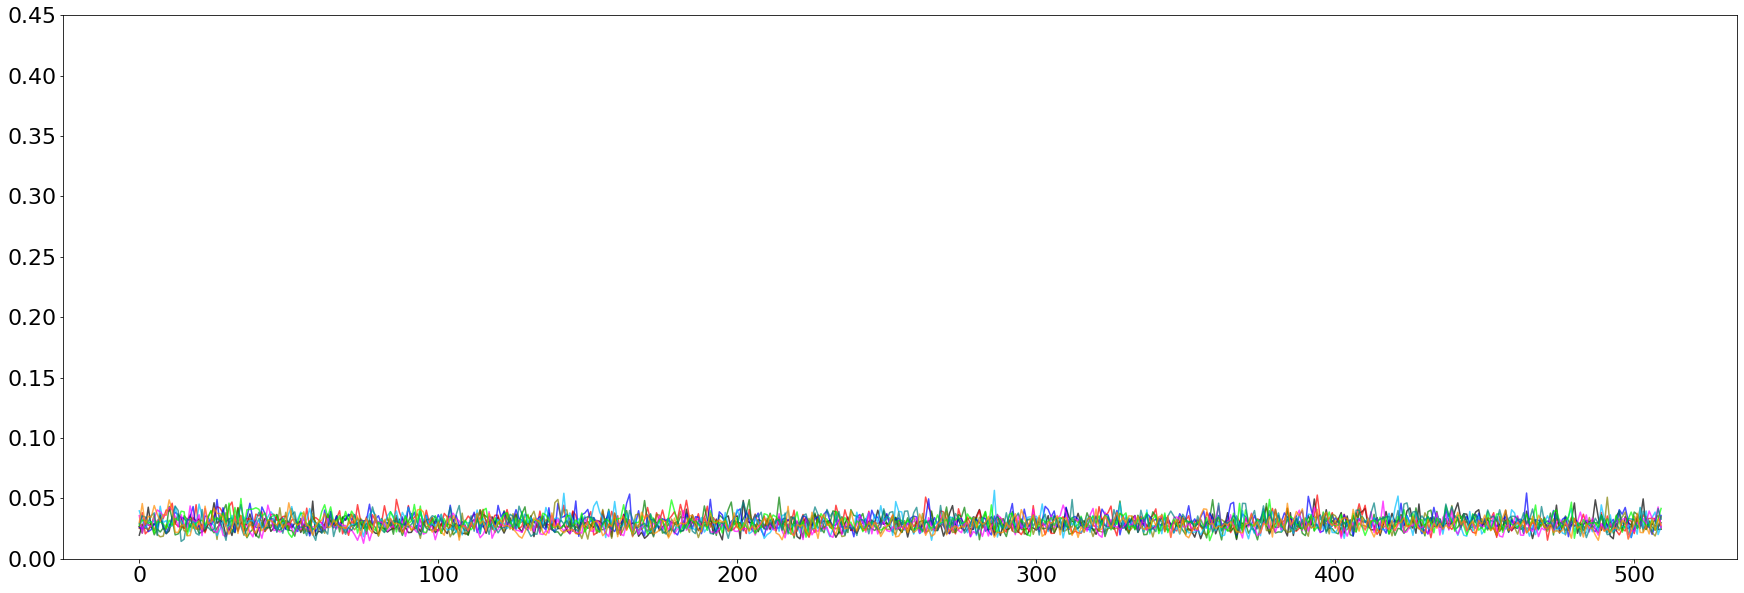

In [52]:
#Plot Rmsd(rmsds) for AS selected region
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)

plt.plot(wtrmsdSELAS.Time[0::step], wtrmsdSELAS.RMSD[0::step], "black", alpha=0.7)
plt.plot(MEDIrmsdSELAS.Time[0::step], MEDIrmsdSELAS.RMSD[0::step], "red", alpha=0.7)
plt.plot(ABENrmsdSELAS.Time[0::step], ABENrmsdSELAS.RMSD[0::step], "green", alpha=0.7)
plt.plot(ADELrmsdSELAS.Time[0::step], ADELrmsdSELAS.RMSD[0::step], "blue", alpha=0.7)
plt.plot(D350HrmsdSELAS.Time[0::step], D350HrmsdSELAS.RMSD[0::step], "olive", alpha=0.7)
plt.plot(M207TrmsdSELAS.Time[0::step], M207TrmsdSELAS.RMSD[0::step], "deepskyblue", alpha=0.7)
plt.plot(M212VrmsdSELAS.Time[0::step], M212VrmsdSELAS.RMSD[0::step], "magenta", alpha=0.7)
plt.plot(R104HrmsdSELAS.Time[0::step], R104HrmsdSELAS.RMSD[0::step], "lime", alpha=0.7)
plt.plot(E156KrmsdSELAS.Time[0::step], E156KrmsdSELAS.RMSD[0::step], "teal", alpha=0.7)
plt.plot(L323PrmsdSELAS.Time[0::step], L323PrmsdSELAS.RMSD[0::step], "darkorange", alpha=0.7)

plt.savefig('ActSite_200_206_rmsd_510nsubset.png')


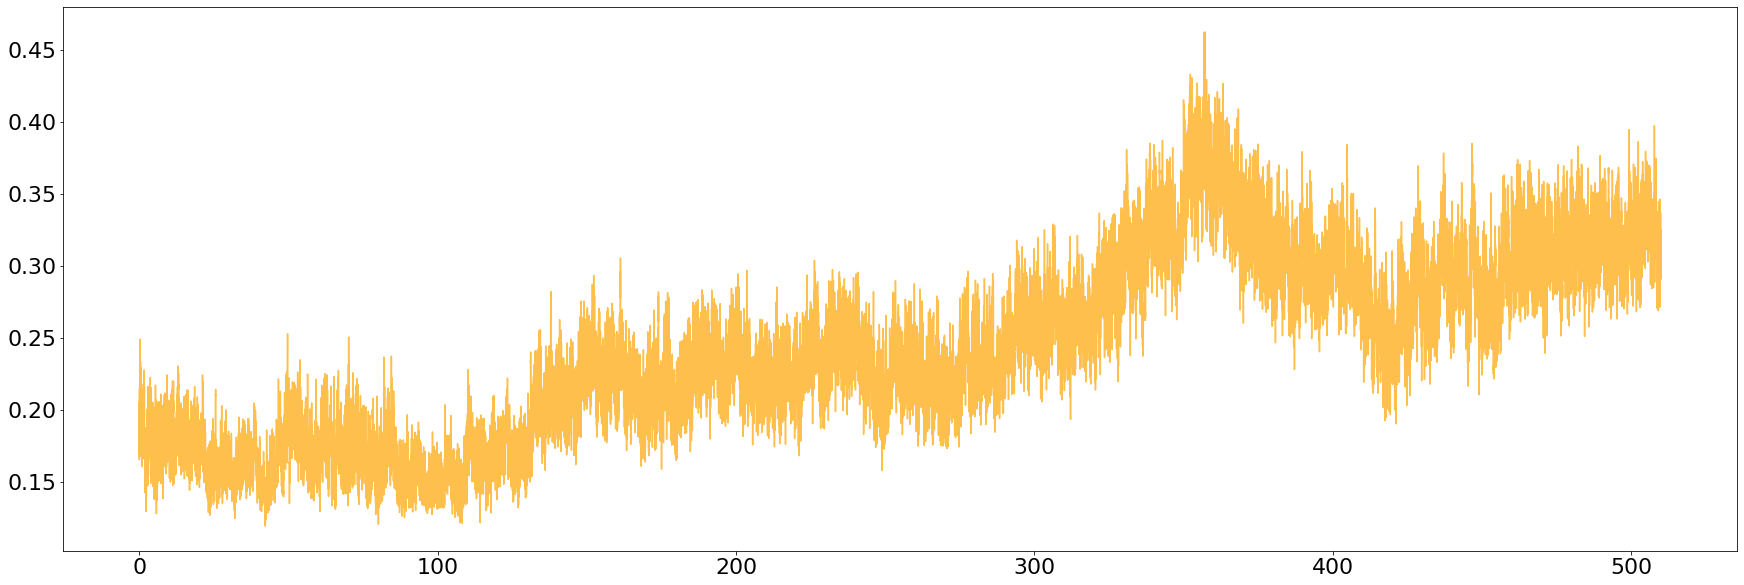

In [28]:

plt.plot(L323PrmsdSELAS.Time, L323Prmsd.RMSD, "darkorange", alpha=0.7)

In [18]:
#load RMSD NADP binding select data
data_home = "/home/jrocha/work_dir/mutations_g6pd/data/"

rmsdsSELNADP = pd.read_csv(data_home+labels[0]+'_Subset1_200_RMSD.csv')
wtrmsdSELNADP = pd.read_csv(data_home+'WT_Subset1_200_RMSD.csv')
MEDIrmsdSELNADP = pd.read_csv(data_home+'MEDI_Subset1_200_RMSD.csv')
ADELrmsdSELNADP = pd.read_csv(data_home+'ADEL_Subset1_200_RMSD.csv')
ABENrmsdSELNADP = pd.read_csv(data_home+'ABEN_Subset1_200_RMSD.csv')
D350HrmsdSELNADP = pd.read_csv(data_home+'D350H_Subset1_200_RMSD.csv')
M207TrmsdSELNADP = pd.read_csv(data_home+'M207T_Subset1_200_RMSD.csv')
M212VrmsdSELNADP = pd.read_csv(data_home+'M212V_Subset1_200_RMSD.csv')
R104HrmsdSELNADP = pd.read_csv(data_home+'R104H_Subset1_200_RMSD.csv')
E156KrmsdSELNADP = pd.read_csv(data_home+'E156K_Subset1_200_RMSD.csv')
L323PrmsdSELNADP = pd.read_csv(data_home+'L323P_Subset1_200_RMSD.csv')


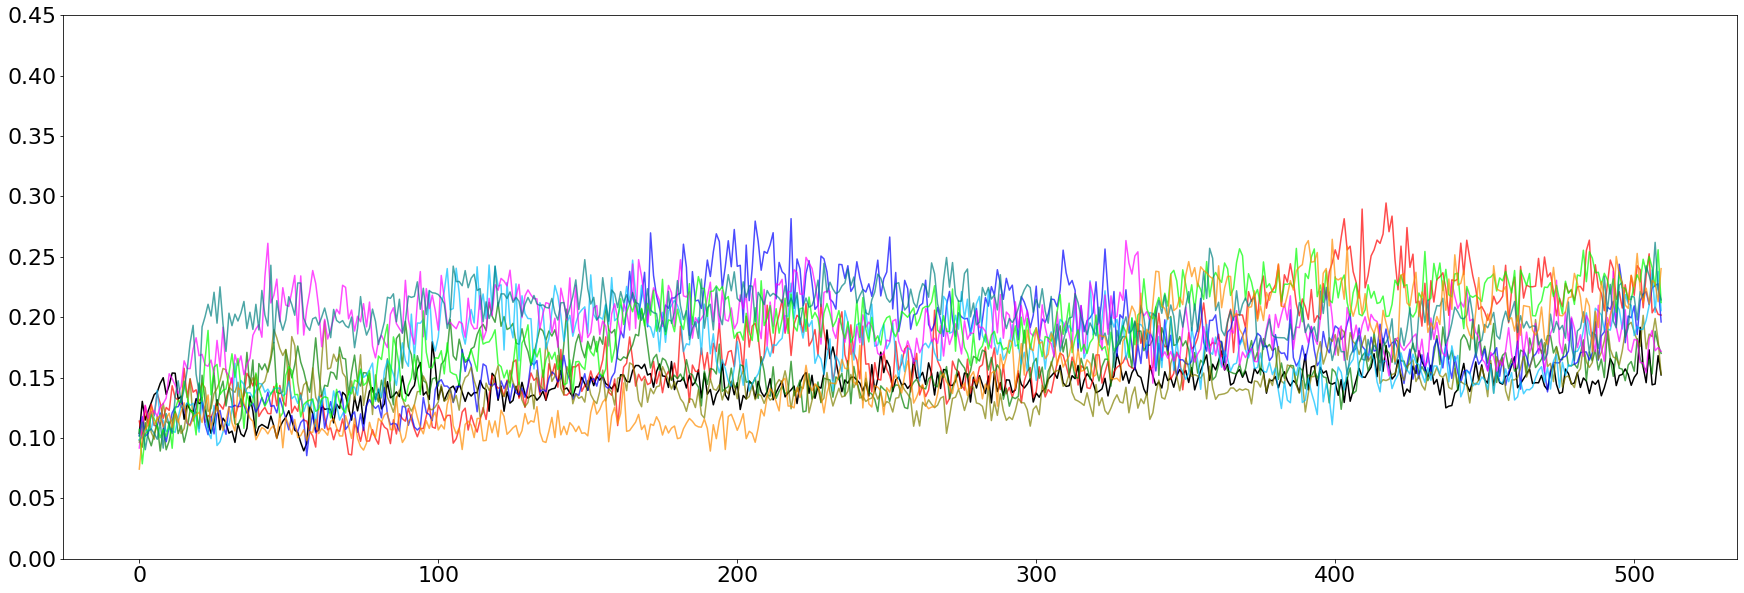

In [38]:
#Plot Rmsd(rmsds) for NADP selected region
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)

plt.plot(wtrmsdSELNADP.Time[0::step], wtrmsdSELNADP.RMSD[0::step], "black")
plt.plot(MEDIrmsdSELNADP.Time[0::step], MEDIrmsdSELNADP.RMSD[0::step], "red", alpha=0.7)
plt.plot(ABENrmsdSELNADP.Time[0::step], ABENrmsdSELNADP.RMSD[0::step], "green", alpha=0.7)
plt.plot(ADELrmsdSELNADP.Time[0::step], ADELrmsdSELNADP.RMSD[0::step], "blue", alpha=0.7)
plt.plot(D350HrmsdSELNADP.Time[0::step], D350HrmsdSELNADP.RMSD[0::step], "olive", alpha=0.7)
plt.plot(M207TrmsdSELNADP.Time[0::step], M207TrmsdSELNADP.RMSD[0::step], "deepskyblue", alpha=0.7)
plt.plot(M212VrmsdSELNADP.Time[0::step], M212VrmsdSELNADP.RMSD[0::step], "magenta", alpha=0.7)
plt.plot(R104HrmsdSELNADP.Time[0::step], R104HrmsdSELNADP.RMSD[0::step], "lime", alpha=0.7)
plt.plot(E156KrmsdSELNADP.Time[0::step], E156KrmsdSELNADP.RMSD[0::step], "teal", alpha=0.7)
plt.plot(L323PrmsdSELNADP.Time[0::step], L323PrmsdSELNADP.RMSD[0::step], "darkorange", alpha=0.7)

plt.savefig('NADPBIND_1_200_rmsd_510nsubset.png')
plt.show()

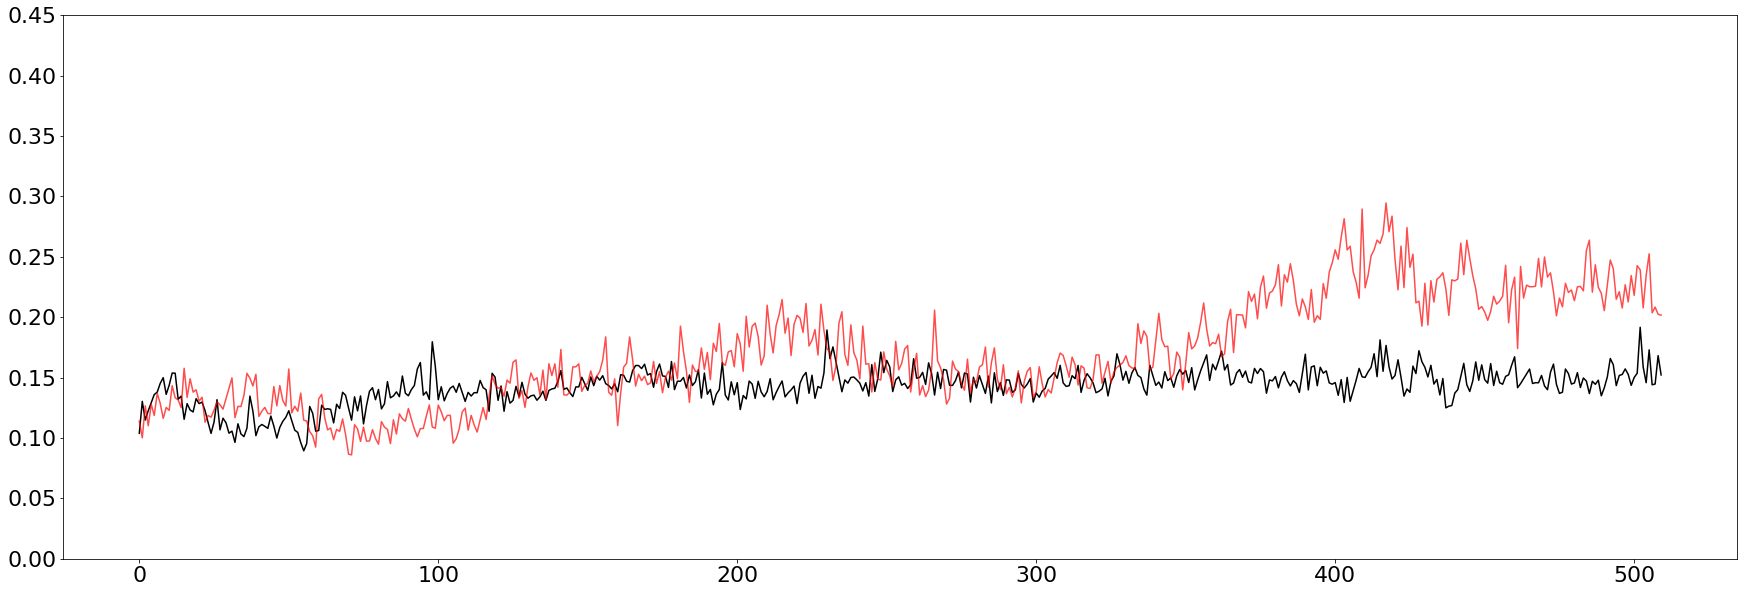

In [26]:
#plot MEDI NADP Binding subset
plt.ylim(0, 0.45)
plt.plot(wtrmsdSELNADP.Time[0::step], wtrmsdSELNADP.RMSD[0::step], "black")
plt.plot(MEDIrmsdSELNADP.Time[0::step], MEDIrmsdSELNADP.RMSD[0::step], "red", alpha=0.7)
plt.savefig('WT_MEDI_rmsd_510ns_NADP_binding.png')

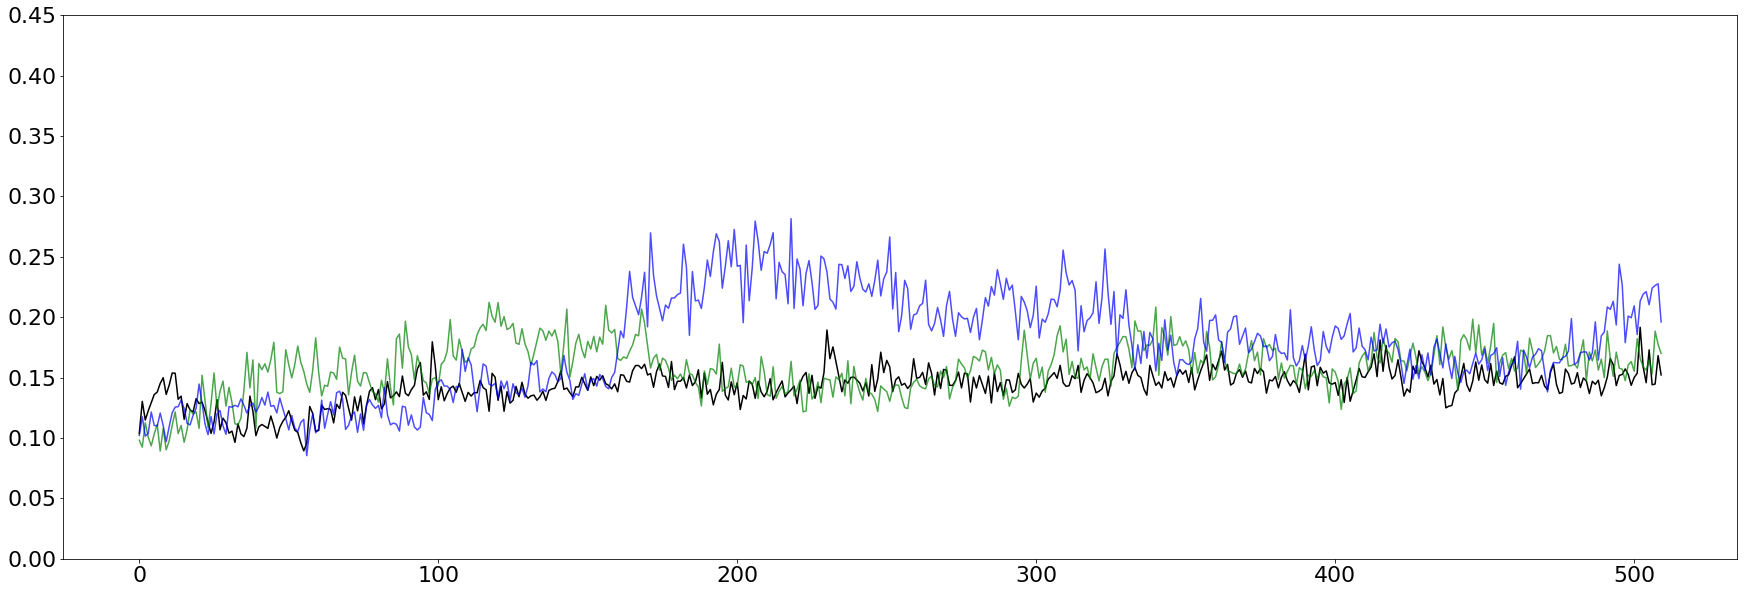

In [28]:
#Plot Rmsd(rmsds) for NADP selected region
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)

plt.plot(wtrmsdSELNADP.Time[0::step], wtrmsdSELNADP.RMSD[0::step], "black")
plt.plot(ABENrmsdSELNADP.Time[0::step], ABENrmsdSELNADP.RMSD[0::step], "green", alpha=0.7)
plt.plot(ADELrmsdSELNADP.Time[0::step], ADELrmsdSELNADP.RMSD[0::step], "blue", alpha=0.7)
plt.savefig('WT_AFS_rmsd_510ns_NADP_binding.png')

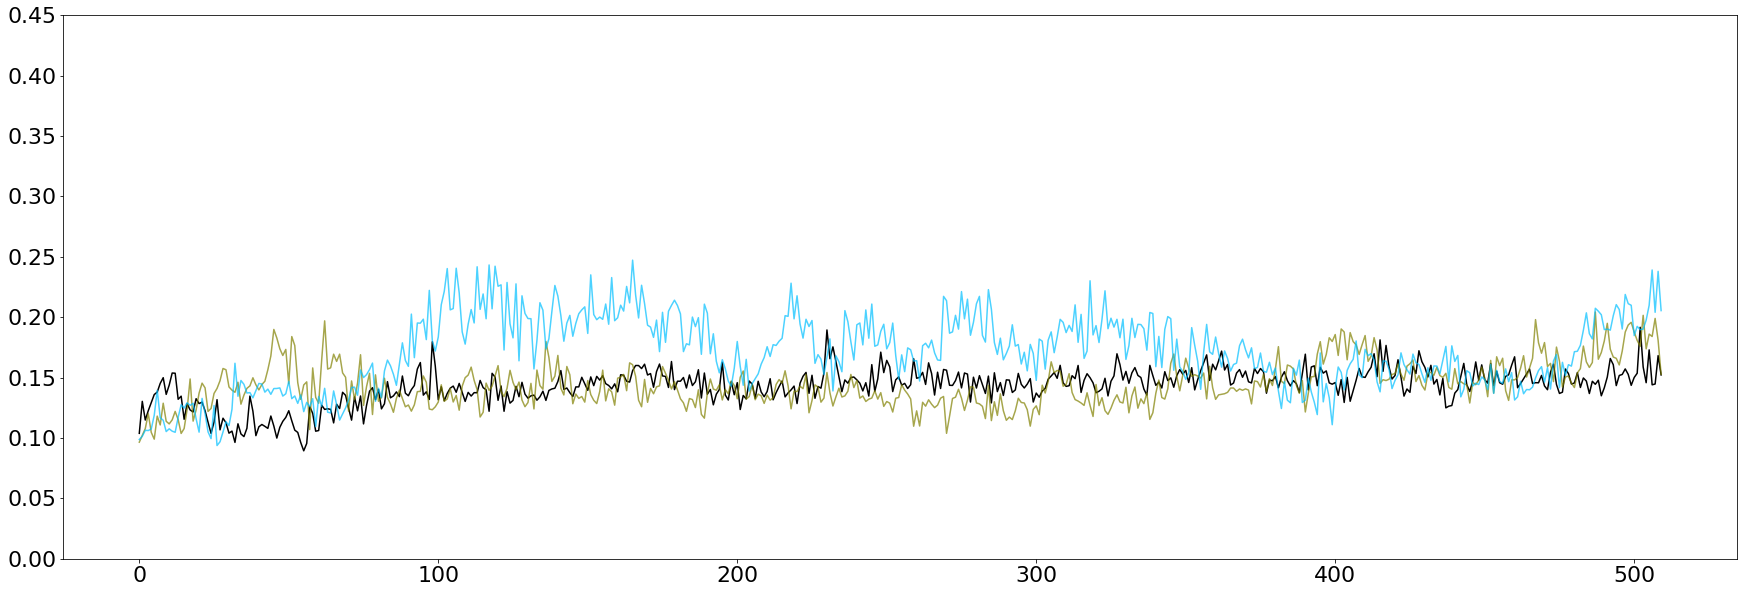

In [39]:
#Plot Rmsd(rmsds) for NADP selected region D350H M207T
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)

plt.plot(wtrmsdSELNADP.Time[0::step], wtrmsdSELNADP.RMSD[0::step], "black")

plt.plot(D350HrmsdSELNADP.Time[0::step], D350HrmsdSELNADP.RMSD[0::step], "olive", alpha=0.7)
plt.plot(M207TrmsdSELNADP.Time[0::step], M207TrmsdSELNADP.RMSD[0::step], "deepskyblue", alpha=0.7)

plt.savefig('WT_D350H_M207T_rmsd_510ns_NADP_binding.png')

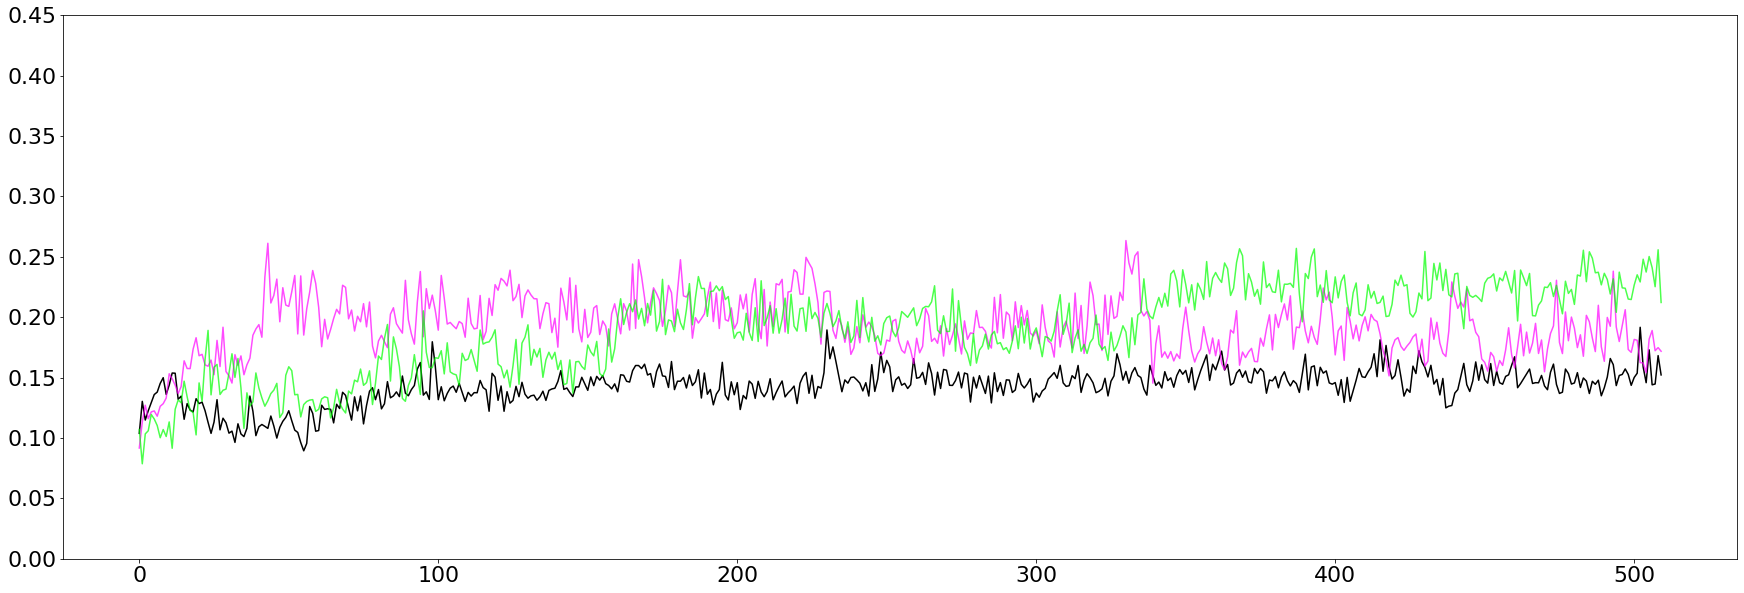

In [53]:
#Plot Rmsd(rmsds) for NADP selected region
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)

plt.plot(wtrmsdSELNADP.Time[0::step], wtrmsdSELNADP.RMSD[0::step], "black")
plt.plot(M212VrmsdSELNADP.Time[0::step], M212VrmsdSELNADP.RMSD[0::step], "magenta", alpha=0.7)
plt.plot(R104HrmsdSELNADP.Time[0::step], R104HrmsdSELNADP.RMSD[0::step], "lime", alpha=0.7)

plt.savefig('WT_M212V_R104H_rmsd_510ns_NADP_binding.png')

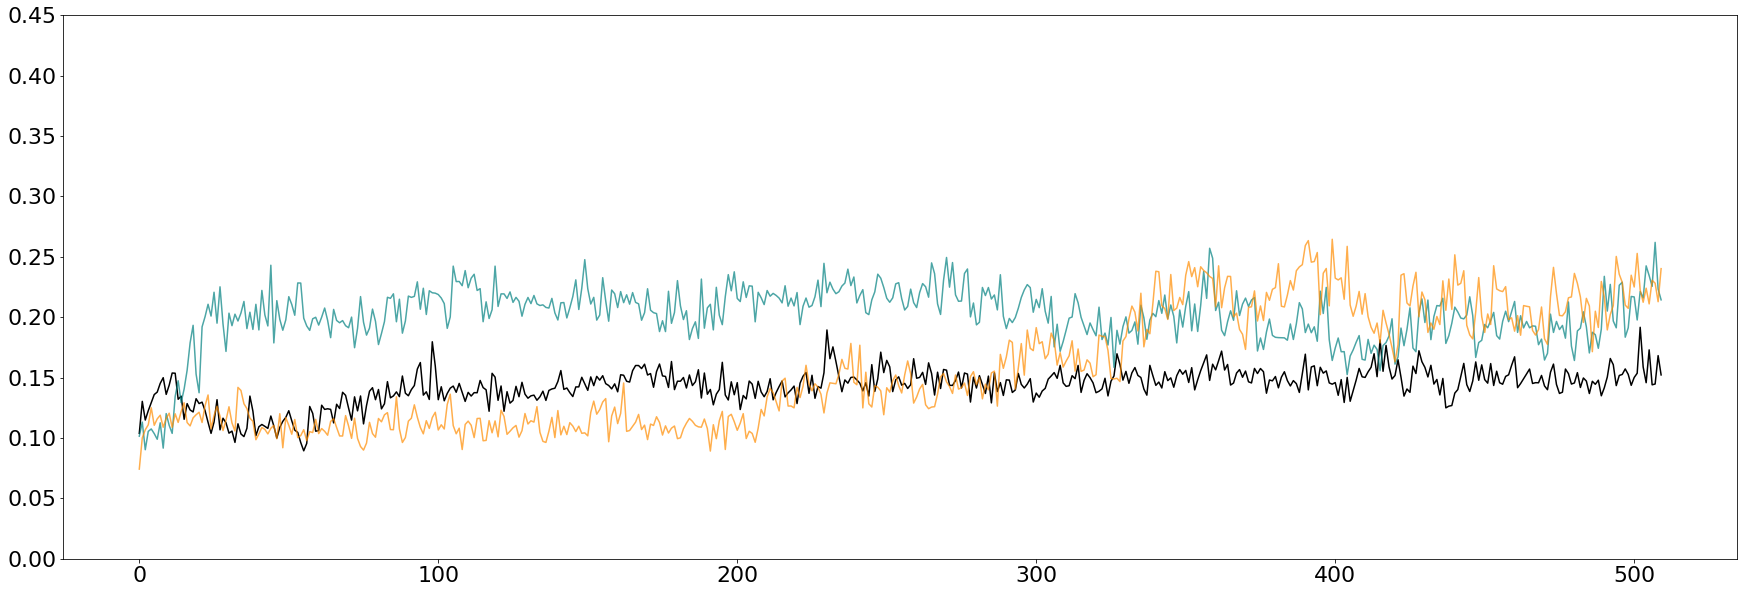

In [54]:
#Plot Rmsd(rmsds) for NADP selected region
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
plt.ylim(0, 0.45)

plt.plot(wtrmsdSELNADP.Time[0::step], wtrmsdSELNADP.RMSD[0::step], "black")
plt.plot(E156KrmsdSELNADP.Time[0::step], E156KrmsdSELNADP.RMSD[0::step], "teal", alpha=0.7)
plt.plot(L323PrmsdSELNADP.Time[0::step], L323PrmsdSELNADP.RMSD[0::step], "darkorange", alpha=0.7)

plt.savefig('WT_E156K_L323P_rmsd_510ns_NADP_binding.png')